# Задача: Дан табличный набор данных из Spotify. Необходимо для тестового набора даных предсказать популярность песен (задача регрессии)

### Импортируем нужные библиотеки и модули

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
!pip install xgboost
from xgboost import XGBRegressor

In [ ]:
!pip install catboost

In [ ]:
from catboost.utils import eval_metric
from catboost import Pool
from catboost import CatBoostRegressor

### Загружаем данные и выводим основную информацию

In [ ]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Таблица имеет информацию о 114000 треков.  
**Unnamed: 0** - индекс строки;  
**treck_id** - id;    
**artists** - исполнитель;  
**album_name** - имя альбома;  
**track_name** - название трека;  
**popularity** - популярность (0-100);  
**duration_ms** - продолжительность;  
**explicit** - присутсвует ли ненормативная лексика в терке;   
**danceability** - насколько подходит для танцев (0.0 - 0.1);  
**energy** - энергичность (0.0 - 0.1);  
**key** - тональность трека (0 - 11);  
**loudness** - стредняя громкотсь трека в дицебелах (отрицательные значения: чем ближе к 0, тем громче);  
**mode** - лад (1 - мажор, 0 - минор);  
**speechiness** - стпень разговорности (0.0 - 1.0);  
**acousticness** - вероятность того, что трек явдяется аккустическим (0.0 - 0.1);    
**instrumentalness** - вероятность, что трек инструментальный, без вокала (0.0 – 1.0);  
**liveness** - вероятность, что трек записан вживую (0.0 – 1.0);  
**valence** - эмоциональная окраска: от мрачного (0.0) до радостного/позитивного (1.0);  
**tempo** - темп трека в ударах в минуту (BPM);  
**time_signature** - размерность музыкального такта;  
**track_genre** - жанр.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Количество записей: 114000

Количество столбцов: 21

Пропуски данных: Почти все столбцы полностью заполнены (114000 non-null), кроме:

artists (113999 non-null)
album_name (113999 non-null)
track_name (113999 non-null)
Распределение переменных по типам данных:

Числовые:

popularity, duration_ms, key, mode, time_signature, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo

Категориальные:

track_id, artists, album_name, track_name, track_genre

Булевы:

explicit

In [ ]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Удаляем дубликаты по track_id

In [ ]:
data.drop_duplicates(['track_id'],inplace=True)

In [ ]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


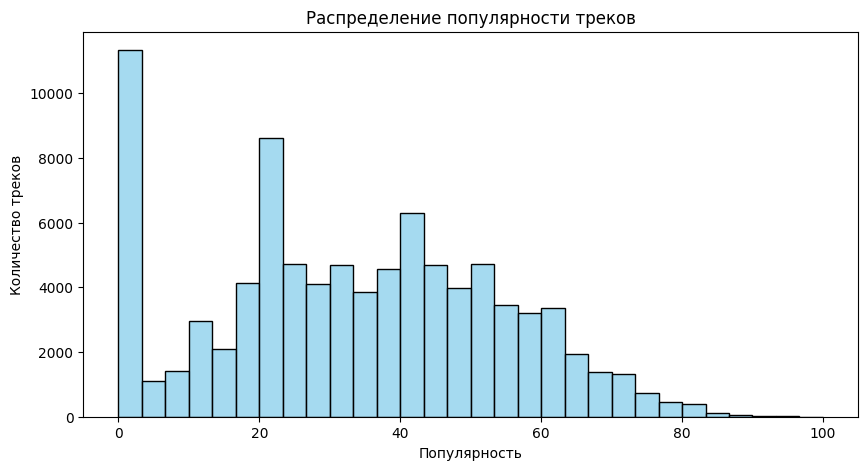

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data["popularity"], bins=30, color="skyblue")
plt.title("Распределение популярности треков")
plt.xlabel("Популярность")
plt.ylabel("Количество треков")
plt.show()

###Самая распространенная категория популярности 0.

###Посмотрим на 10 музыкантов с самым большим количесвтом треков в датасете

<ipython-input-239-0e88c91627b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


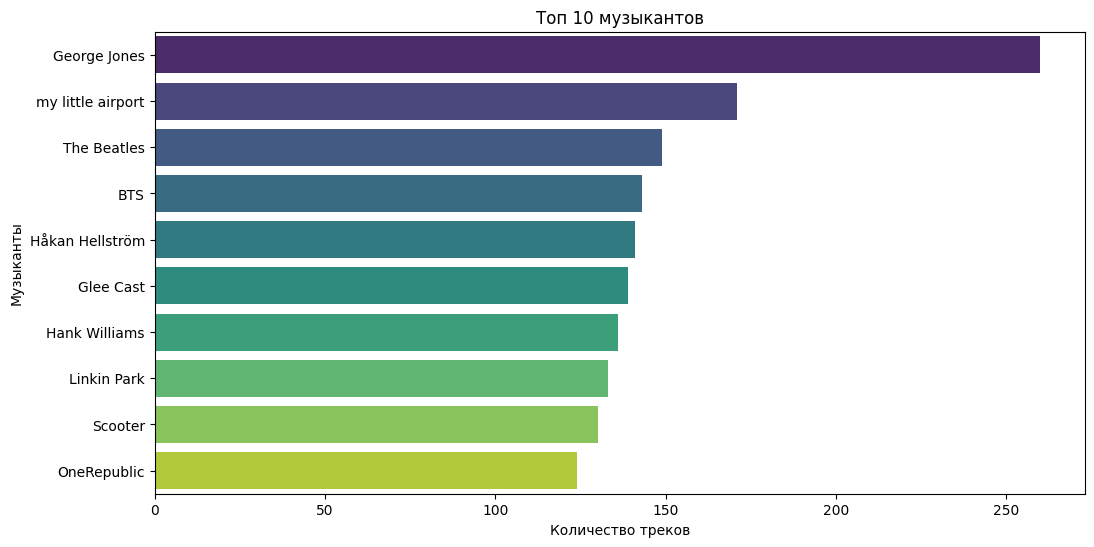

In [ ]:
top_artists = data['artists'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Топ 10 музыкантов')
plt.xlabel('Количество треков')
plt.ylabel('Музыканты')
plt.show()

Топ:  Goerge Jones, my little airport Beatles

### Выведем Корреляцию для категориального признака track_genres с target

genre_k-pop         0.129152
genre_pop-film      0.120470
genre_chill         0.104435
genre_grunge        0.083207
genre_anime         0.080150
genre_emo           0.076165
genre_indian        0.073050
genre_sad           0.069212
genre_sertanejo     0.068667
genre_deep-house    0.062918
Name: popularity, dtype: float64


<ipython-input-240-fc08afd6f797>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_corr.head(10).values, y=genre_corr.head(10).index, palette="crest")


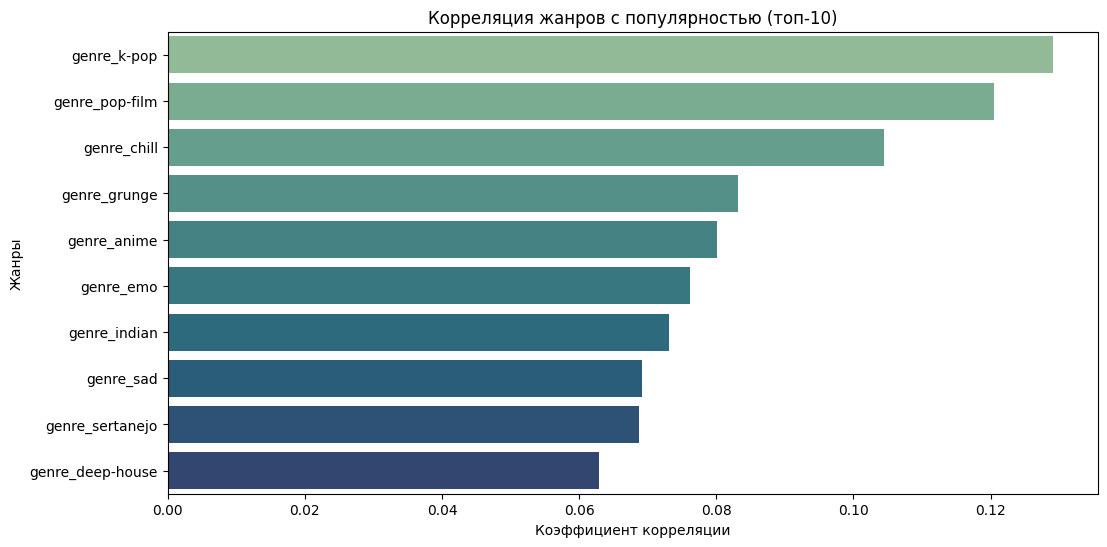

genre_jazz             -0.087167
genre_idm              -0.090711
genre_kids             -0.094374
genre_classical        -0.095197
genre_grindcore        -0.095600
genre_latin            -0.104755
genre_chicago-house    -0.107511
genre_detroit-techno   -0.111264
genre_romance          -0.145322
genre_iranian          -0.158789
Name: popularity, dtype: float64


<ipython-input-240-fc08afd6f797>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_corr.tail(10).values, y=genre_corr.tail(10).index, palette="flare")


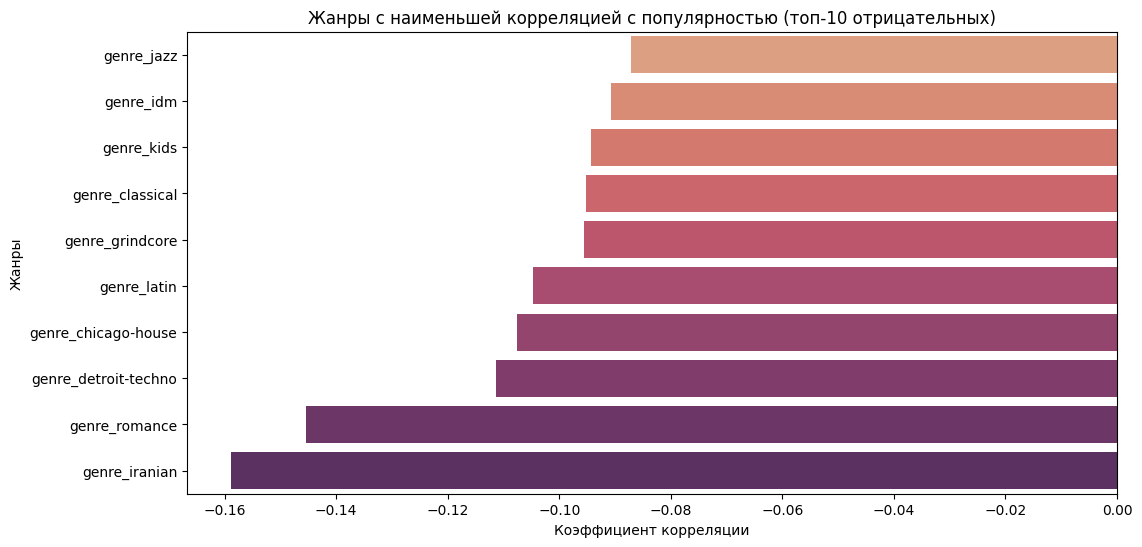

In [ ]:
data_genres = pd.get_dummies(data["track_genre"], prefix="genre", drop_first=True)

data_corr = pd.concat([data[["popularity"]], data_genres], axis=1)
genre_corr = data_corr.corr()["popularity"].drop("popularity").sort_values(ascending=False)

print(genre_corr.head(10))
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_corr.head(10).values, y=genre_corr.head(10).index, palette="crest")
plt.title("Корреляция жанров с популярностью (топ-10)")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Жанры")
plt.show()

print(genre_corr.tail(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_corr.tail(10).values, y=genre_corr.tail(10).index, palette="flare")
plt.title("Жанры с наименьшей корреляцией с популярностью (топ-10 отрицательных)")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Жанры")
plt.show()

### Из графиков видно, что наибольшую корреляцию имеет жанр k-film 0.13, а наименьшую имеет iranian -0.15. В целом видно, что жанр не сильно коррелирует с target

### Удаляем столбцы 'Unnamed: 0' и 'track_id' так как они уникальные для каждого трека и не несут полезной информации

In [ ]:
data.drop(['Unnamed: 0','track_id'],inplace=True,axis=1)


In [ ]:
data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Выделяем стобец popularity в target

In [ ]:
target = data.loc[:,'popularity']
target

,popularity
0,73
1,55
2,57
3,71
4,82
...,...
113995,21
113996,22
113997,22
113998,41


### Выделяем категориальные данные для catboost

In [ ]:
categorical_features = ['artists','album_name','track_name','explicit','track_genre','mode','time_signature']

In [ ]:
data[categorical_features] = data[categorical_features].astype(str)

In [ ]:
data.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

### Выведем распределения для некоторых признаков

In [ ]:
features = ['popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre']

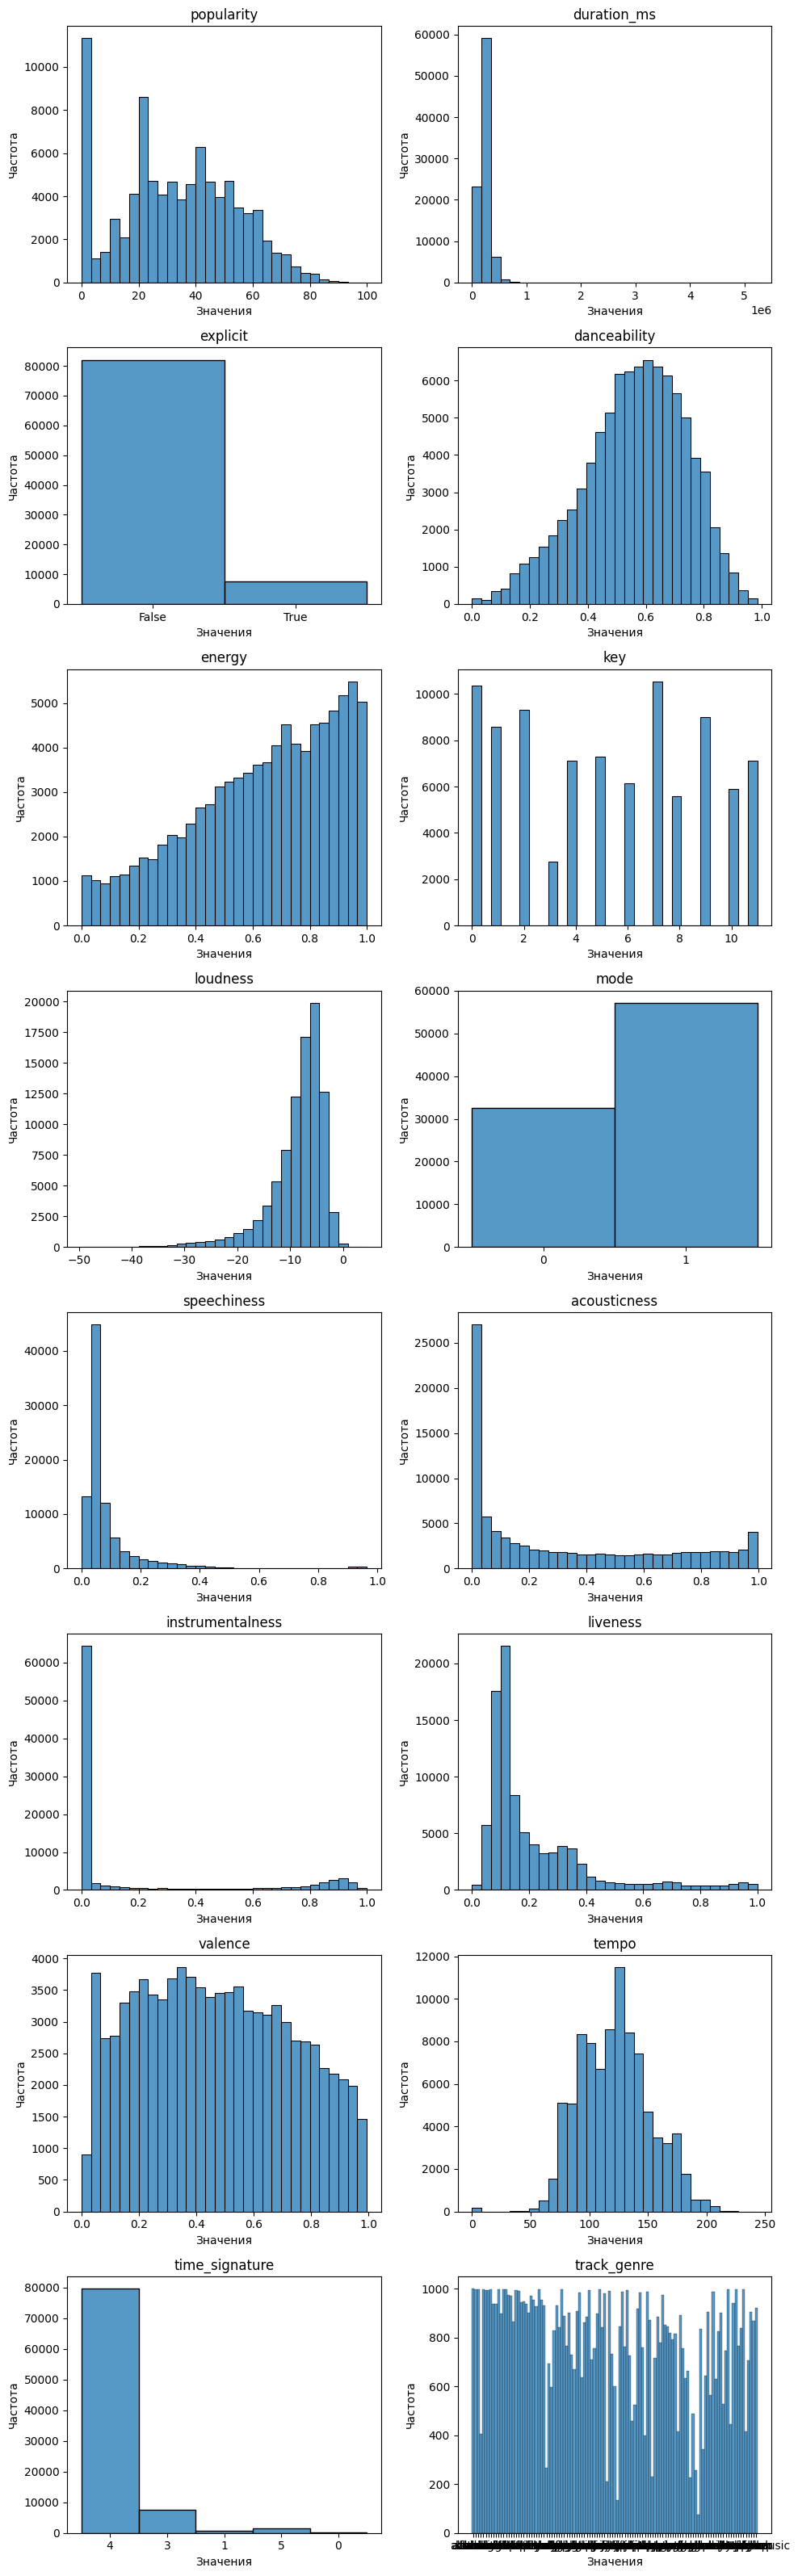

In [ ]:
width = 2
height = int(np.ceil(len(features) / width))

fig, axes = plt.subplots(nrows=height, ncols=width, figsize=(10, 4 * height))
axes = axes.flatten()

for idx, column in enumerate(features):
    sns.histplot(data=data, x=column, bins=30, ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].set_xlabel('Значения')
    axes[idx].set_ylabel('Частота')

plt.tight_layout()
plt.show()

1. **Распределение dancebility,tempo**

 Нормальное распределение

2. **Распределение energy**

Распределение смещено вправо - большинство треков имеют высокую энергичность;

3. **Распределение loudness**

Нормальное распределение с пиком около -10;

### Выведем корреляционную матрицу

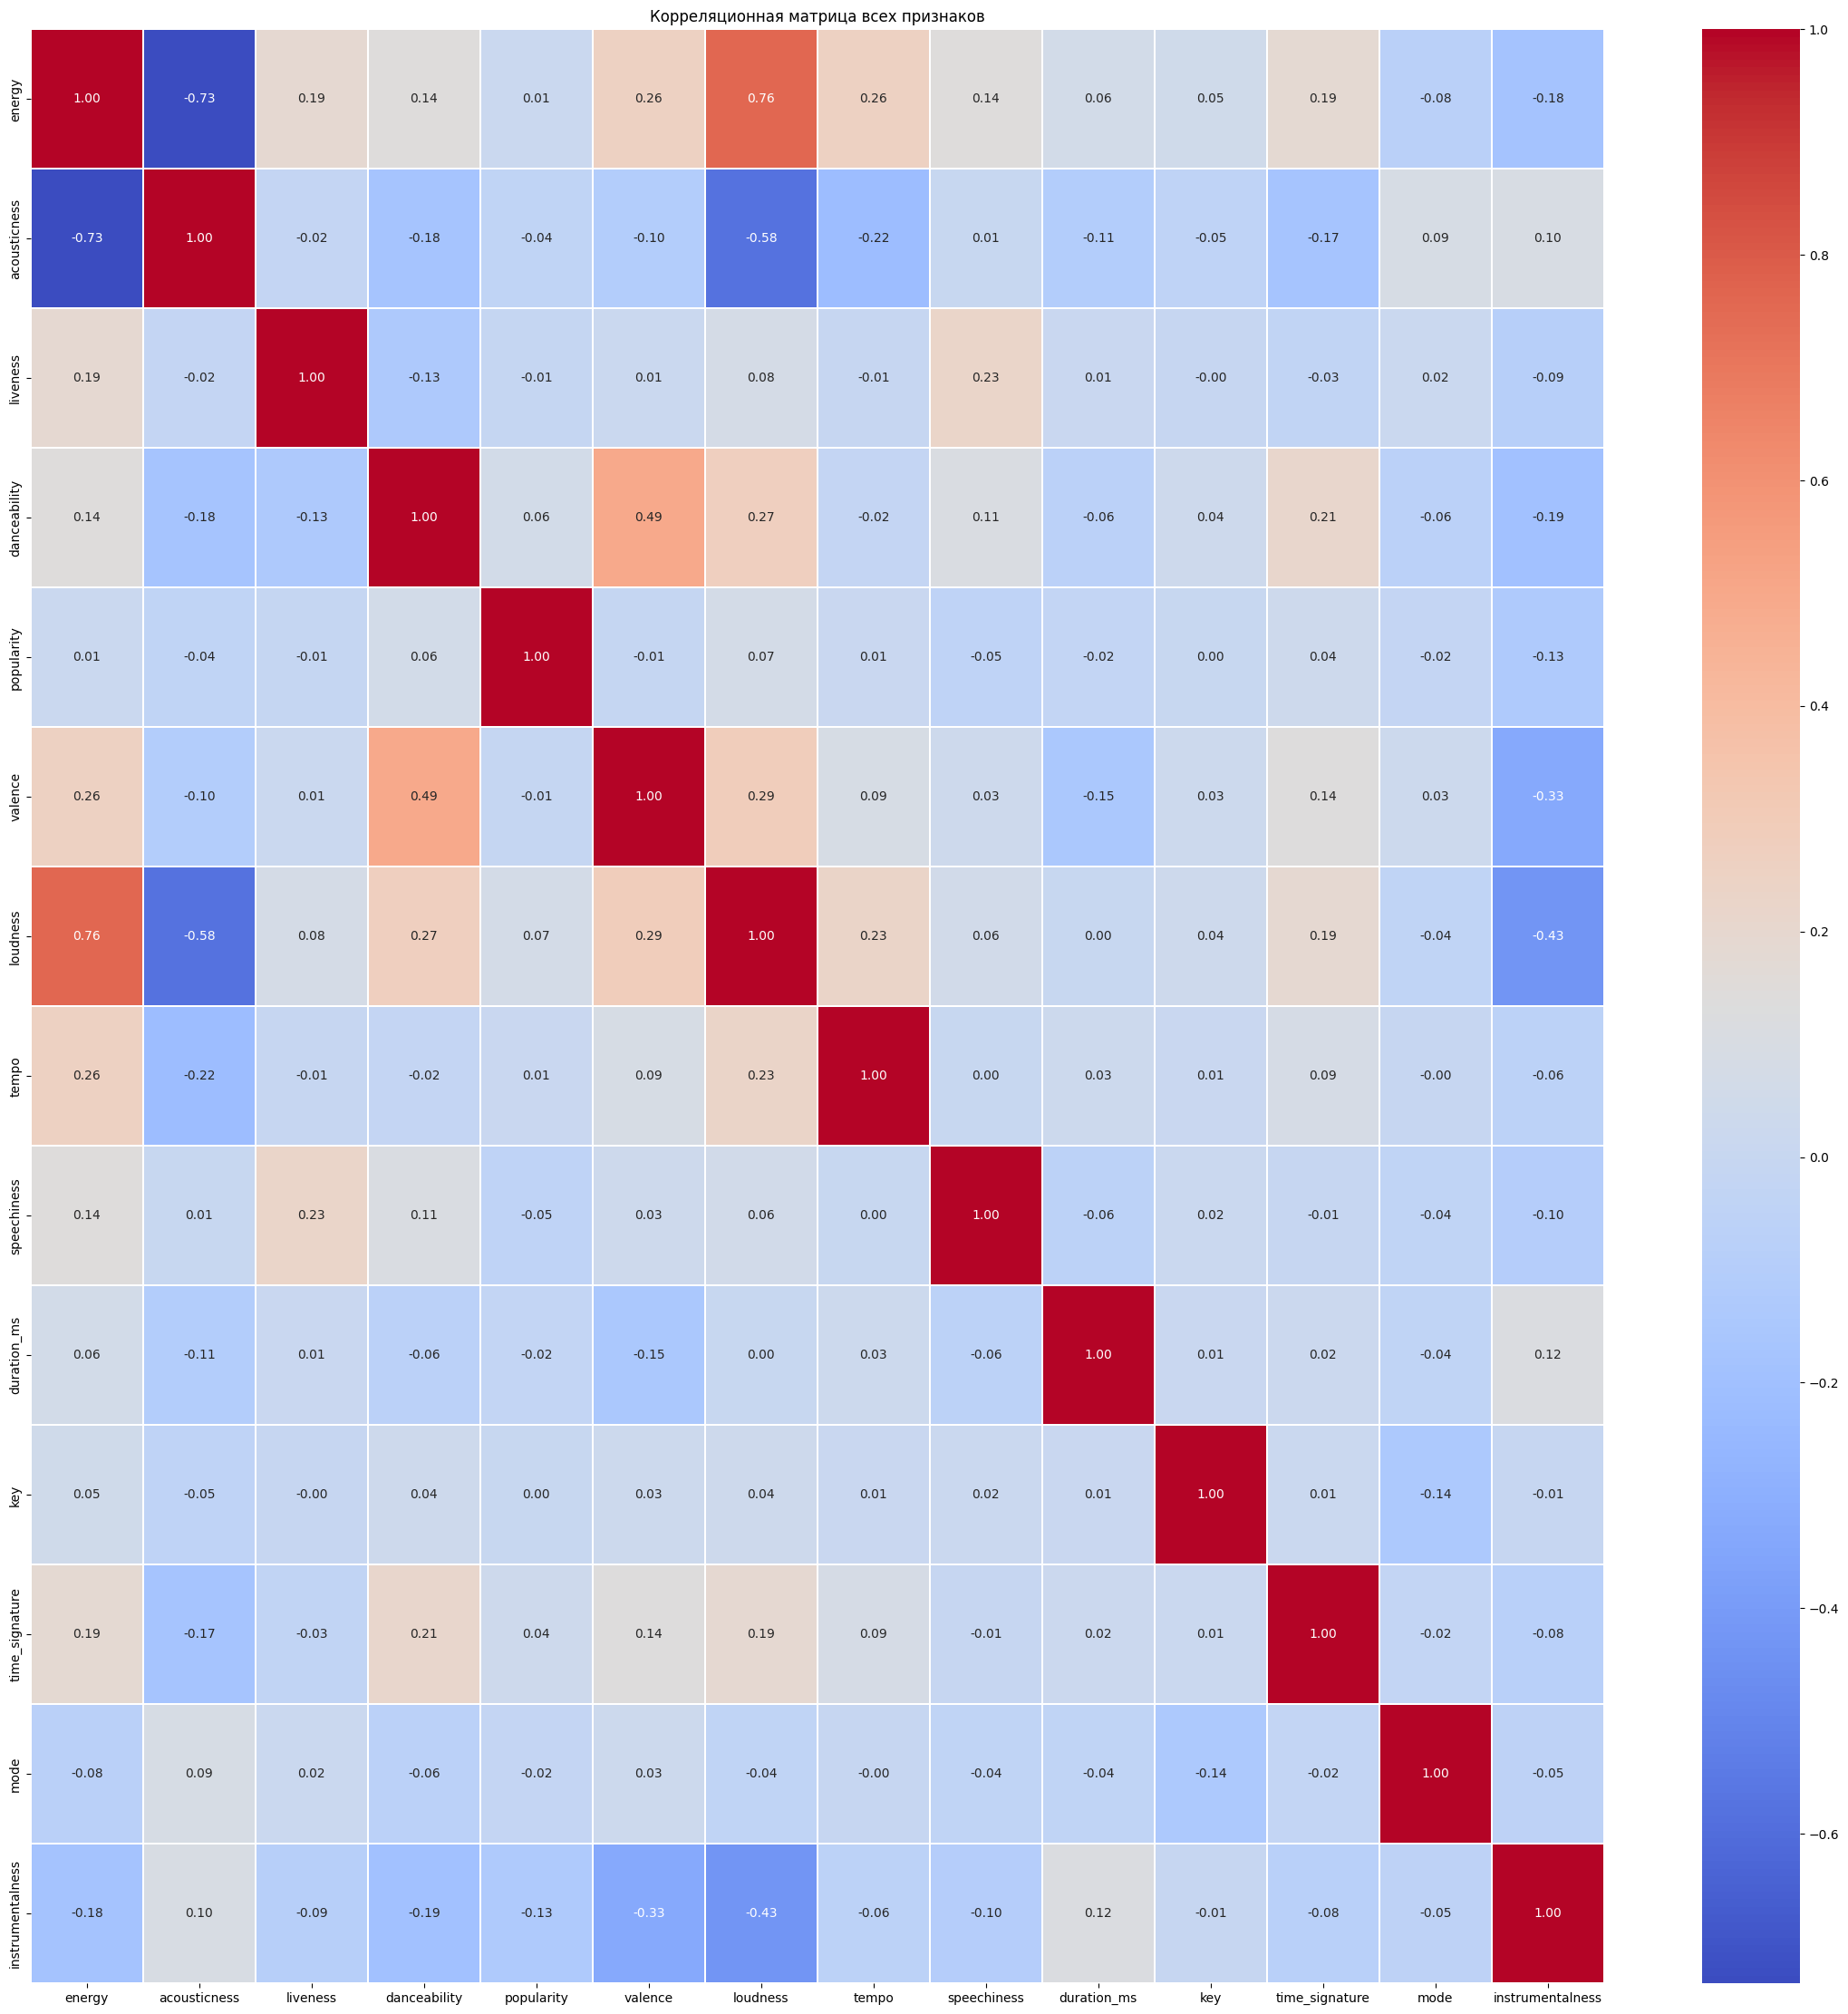

In [ ]:
corr_matrix = data[list(set(features)-set(['track_genre','explicit']))].corr()

plt.figure(figsize=(28, 28))
sns.heatmap(corr_matrix,  cmap='coolwarm', linewidths=0.1,annot=True,fmt='.2f')
plt.title('Корреляционная матрица всех признаков')
plt.show()

<ipython-input-250-efd56967b09c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')


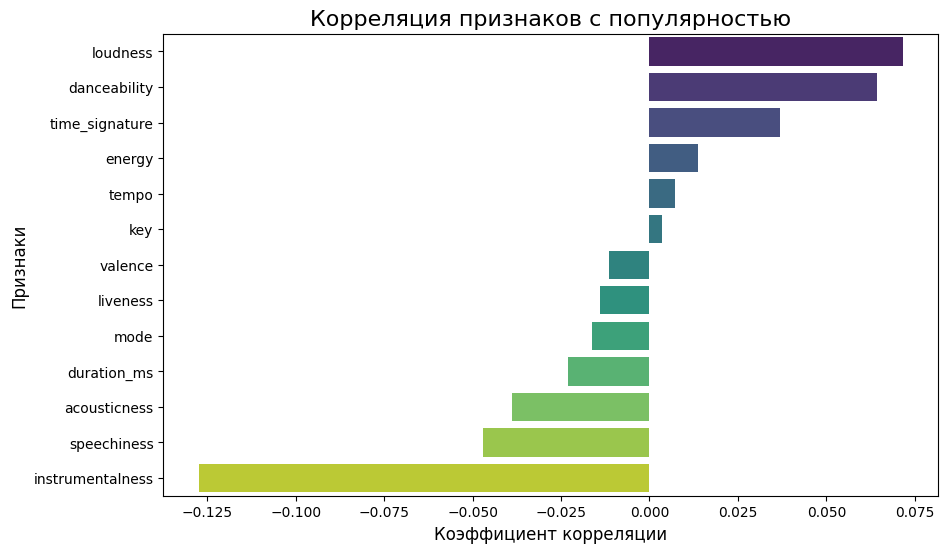

In [ ]:
corr_with_target = corr_matrix['popularity'].sort_values(ascending=False)[1:]
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')
plt.title('Корреляция признаков с популярностью', fontsize=16)
plt.xlabel('Коэффициент корреляции', fontsize=12)
plt.ylabel('Признаки', fontsize=12)
plt.show()

### С  popularity есть слабая отрицательная корреляция с instrumentalness (инструментальность). остальные корреляции с popularity незначительны

### Создадим несколько новых признаков

In [ ]:
data["energy_valence"] = data["energy"] * data["valence"]
data["dance_energy"] = data["danceability"] * data["energy"]
data["is_spoken"] = (data["speechiness"] > 0.66).astype(int)
data["tempo_loudness"] = data["tempo"] * data["loudness"]
data['track_name_word_count'] = data['track_name'].str.split().str.len()
data['artist_track_count'] = data.groupby('artists')['track_name'].transform('count')

In [ ]:
data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,valence,tempo,time_signature,track_genre,energy_valence,dance_energy,is_spoken,tempo_loudness,track_name_word_count,artist_track_count
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.7150,87.917,4,acoustic,0.329615,0.311636,0,-593.088082,1,7
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.2670,77.489,4,acoustic,0.044322,0.069720,0,-1335.522915,3,9
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.1200,76.332,4,acoustic,0.043080,0.157242,0,-743.015688,3,1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.1430,181.740,3,acoustic,0.008523,0.015854,0,-3364.916100,5,15
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0.1670,119.949,4,acoustic,0.073981,0.273774,0,-1161.226269,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,...,0.0339,125.995,5,world-music,0.007966,0.040420,0,-2065.436035,4,4
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,...,0.0350,85.239,4,world-music,0.004095,0.020358,0,-1561.408002,3,4
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,...,0.7430,132.378,4,world-music,0.244447,0.206941,0,-1442.258310,2,14
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,...,0.4130,135.960,4,world-music,0.208978,0.297022,0,-1480.468440,1,28


###  energy_valence - энергичность * эмоциональная окраска
###  dance_energy - энергичность * танцевальность
###  is_spoken - песня со большим кол-вом слов(1), иначе 0
###  tempo_loudness - темп * громкость
###  track_name_word_count - ко-во слов в названии
###  artist_track_count - кол-во треков в датасете этого исполнителя

### Делим данные на train и test выборки

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('popularity',axis=1),target,test_size=0.2,random_state=42)

In [ ]:
x_train

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,...,valence,tempo,time_signature,track_genre,energy_valence,dance_energy,is_spoken,tempo_loudness,track_name_word_count,artist_track_count
33662,eli.,the way we used to love.,disappear,225600,False,0.565,0.4670,5,-7.741,0,...,0.116,112.499,3,emo,0.054172,0.263855,0,-870.854759,1,3
6478,Behemoth,Opvs Contra Natvram,Neo-Spartacvs,258160,False,0.148,0.9780,6,-4.020,0,...,0.340,66.121,4,black-metal,0.332520,0.144744,0,-265.806420,1,22
82245,Hoodoo Gurus,Stoneage Romeos,(Let's All) Turn On - Remaster 2005,184746,False,0.417,0.9410,4,-3.325,1,...,0.414,114.952,4,power-pop,0.389574,0.392397,0,-382.215400,7,32
68613,J Balvin;Ed Sheeran,Sigue/Forever My Love,Sigue,159386,True,0.889,0.6410,7,-4.494,1,...,0.588,87.990,4,latino,0.376908,0.569849,0,-395.427060,1,2
87510,7 Minutoz;Sid;Rod 3030,Jogador Número 1,Jogador Número 1,292819,True,0.748,0.7280,5,-6.180,0,...,0.635,100.049,4,r-n-b,0.462280,0.544544,0,-618.302820,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6870,Thorns,Thorns,Shifting Channels,377026,False,0.606,0.6740,11,-6.982,0,...,0.102,112.505,4,black-metal,0.068748,0.408444,0,-785.509910,2,2
64791,Nat King Cole Trio,Christmas Eve At Home,All I Want For Christmas (Is My Two Front Teeth),151333,False,0.771,0.1580,6,-10.374,0,...,0.504,130.072,4,jazz,0.079632,0.121818,0,-1349.366928,10,14
96880,Jorge Aragão,Samba Social Clube Vol. 1,O Mar Serenou - Live,167230,False,0.461,0.5860,5,-11.824,1,...,0.684,91.570,4,samba,0.400824,0.270146,0,-1082.723680,5,30
860,The Mayries,I Will Wait,I Will Wait,216841,False,0.421,0.1070,6,-15.191,1,...,0.118,104.218,4,acoustic,0.012626,0.045047,0,-1583.175638,3,10


### Создаю Pool для catboost

In [ ]:
train_pool = Pool(x_train,y_train,cat_features=categorical_features)

### Создаю модель catboost и обучаю ее на train_pool

In [ ]:
model = CatBoostRegressor( iterations = 1700,
                           learning_rate=0.07,
                           random_seed=42,
                           has_time=True,
                           depth=11,
                           l2_leaf_reg=11,
                           task_type="GPU")

In [ ]:
model.fit(train_pool)

0:	learn: 19.8679190	total: 68.8ms	remaining: 1m 56s
1:	learn: 19.1814200	total: 136ms	remaining: 1m 55s
2:	learn: 18.5325685	total: 187ms	remaining: 1m 45s
3:	learn: 17.9529796	total: 234ms	remaining: 1m 39s
4:	learn: 17.4140052	total: 283ms	remaining: 1m 36s
5:	learn: 16.9344452	total: 328ms	remaining: 1m 32s
6:	learn: 16.4824146	total: 372ms	remaining: 1m 30s
7:	learn: 16.0967387	total: 407ms	remaining: 1m 26s
8:	learn: 15.7531609	total: 441ms	remaining: 1m 22s
9:	learn: 15.4105487	total: 471ms	remaining: 1m 19s
10:	learn: 15.1148540	total: 530ms	remaining: 1m 21s
11:	learn: 14.8450080	total: 562ms	remaining: 1m 19s
12:	learn: 14.5952458	total: 595ms	remaining: 1m 17s
13:	learn: 14.3788523	total: 627ms	remaining: 1m 15s
14:	learn: 14.1625559	total: 659ms	remaining: 1m 14s
15:	learn: 14.0301371	total: 698ms	remaining: 1m 13s
16:	learn: 13.8577886	total: 744ms	remaining: 1m 13s
17:	learn: 13.6915716	total: 787ms	remaining: 1m 13s
18:	learn: 13.5330129	total: 823ms	remaining: 1m 12s
19

### Делаю предсказания для тестового набора данных и визуадбно сравниваю их по первым 5 значениям с правильными ответами y_test

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[:5]

array([ 6.72609859, 29.33987428,  0.1250725 , 42.02059674, 18.24862951])

In [ ]:
y_test

,popularity
67140,2
107395,30
19476,0
74083,48
108906,16
...,...
84577,32
15454,58
100461,37
18887,20


### Метрика RMSE (корень из средней квадратичной ошибки) для предсказаний для тестового набора данных

In [ ]:
eval_metric(y_test.values,y_pred, 'RMSE')

[9.50756821371803]

### Метрика MAE (Средняя ошибка) для предсказаний для тестового набора данных

In [ ]:
eval_metric(y_test.values,y_pred,"MAE")

[6.751275570929975]

### Выделим категориальные и числовые признаки для других моделй

In [ ]:
all_columns = set(data.columns)
categorical_cols_set = set(categorical_features+['popularity'])

numeric_features = list(all_columns - categorical_cols_set)

In [ ]:
categorical_features_2 = ['track_genre', 'explicit']

In [ ]:
numerical_features_2 = x_train.drop(categorical_features,axis=1).columns.tolist() + ['mode','time_signature']

In [ ]:
x_train_2 = x_train[categorical_features_2 + numerical_features_2]

### Посмотрим на новые x_train_2 и x_test_2

In [ ]:
x_train_2

,track_genre,explicit,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,...,valence,tempo,energy_valence,dance_energy,is_spoken,tempo_loudness,track_name_word_count,artist_track_count,mode,time_signature
33662,emo,False,225600,0.565,0.4670,5,-7.741,0.0485,0.643000,0.000000,...,0.116,112.499,0.054172,0.263855,0,-870.854759,1,3,0,3
6478,black-metal,False,258160,0.148,0.9780,6,-4.020,0.1870,0.000022,0.000084,...,0.340,66.121,0.332520,0.144744,0,-265.806420,1,22,0,4
82245,power-pop,False,184746,0.417,0.9410,4,-3.325,0.0555,0.000938,0.000086,...,0.414,114.952,0.389574,0.392397,0,-382.215400,7,32,1,4
68613,latino,True,159386,0.889,0.6410,7,-4.494,0.0668,0.051500,0.000028,...,0.588,87.990,0.376908,0.569849,0,-395.427060,1,2,1,4
87510,r-n-b,True,292819,0.748,0.7280,5,-6.180,0.1560,0.382000,0.000000,...,0.635,100.049,0.462280,0.544544,0,-618.302820,3,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6870,black-metal,False,377026,0.606,0.6740,11,-6.982,0.0714,0.151000,0.043100,...,0.102,112.505,0.068748,0.408444,0,-785.509910,2,2,0,4
64791,jazz,False,151333,0.771,0.1580,6,-10.374,0.0621,0.895000,0.000000,...,0.504,130.072,0.079632,0.121818,0,-1349.366928,10,14,0,4
96880,samba,False,167230,0.461,0.5860,5,-11.824,0.0705,0.736000,0.000703,...,0.684,91.570,0.400824,0.270146,0,-1082.723680,5,30,1,4
860,acoustic,False,216841,0.421,0.1070,6,-15.191,0.0335,0.948000,0.000000,...,0.118,104.218,0.012626,0.045047,0,-1583.175638,3,10,1,4


In [ ]:
x_test_2 = x_test[categorical_features_2 + numerical_features_2]

### Попробуем выделить только часто встречающиеся жанры

In [ ]:
x_train_2['track_genre'].value_counts()

,count
track_genre,
ambient,824
anime,822
sleep,820
afrobeat,805
alt-rock,804
...,...
metal,189
punk,179
house,170


### Сокращение оказалось неэфективным при тесте, поэтому  код ниже закомментирован

In [ ]:
# column = 'track_genre'
# freq = x_train_2[column].value_counts(normalize=True)
# rare_categories = freq[freq < 0.01].index
# x_train_2[column] = x_train_2[column].apply(lambda x: 'rare' if x in rare_categories else x)
# x_train_2[column].value_counts()

### Создадим preprocessor для кодирования категориальных данных и масштабирования числовых

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_2),
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_features_2)
    ])

### Выведем данные, получившиеся после preprocessor

In [ ]:
X_processed = preprocessor.fit_transform(x_train_2)
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features_2)

all_columns = numerical_features_2 + list(cat_cols)
X_train_encoded = pd.DataFrame(X_processed, columns=all_columns)
X_train_encoded

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,explicit_False,explicit_True
0,-0.031168,0.016915,-0.652908,-0.079216,0.145934,-0.343737,0.929728,-0.536779,-0.586460,-1.342302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.254081,-2.343117,1.338204,0.201598,0.856036,0.876306,-0.969089,-0.536521,-0.701704,-0.491143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.389077,-0.820698,1.194033,-0.360029,0.988667,-0.282074,-0.966385,-0.536513,1.370123,-0.209957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.611248,1.850609,0.025083,0.482412,0.765580,-0.182533,-0.817068,-0.536694,-0.140851,0.451211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.557717,1.052613,0.364079,-0.079216,0.443830,0.603228,0.158952,-0.536779,-0.099875,0.629803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71787,1.295429,0.248957,0.153668,1.605667,0.290779,-0.142012,-0.523228,-0.403870,-0.550606,-1.395500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71788,-0.681798,1.182782,-1.856927,0.201598,-0.356538,-0.223935,1.673924,-0.536779,-0.376460,0.132027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71789,-0.542529,-0.571678,-0.189224,-0.079216,-0.633251,-0.149940,1.204372,-0.534611,2.117927,0.815994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71790,-0.107903,-0.798060,-2.055648,0.201598,-1.275797,-0.475872,1.830442,-0.536779,-0.662777,-1.334703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Попробуем использовать другие модели линейные и бустинги для регрессии
### Используем сетку параметров для вычисления лучшей модели и лучших параметров

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(max_iter=10000),
    'Ridge Regression': Ridge(),
    'ElasticNet': ElasticNet(max_iter=10000),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

In [ ]:
param_grids = {
    'Linear Regression':{

    },
    'Lasso Regression': {
        'model__alpha': [0.01, 0.1, 1, 10]
    },
    'Ridge Regression': {
        'model__alpha': [0.01, 0.1, 1, 10]
    },
    'ElasticNet': {
        'model__alpha': [0.01, 0.1, 1],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 7, 10],
        'model__learning_rate': [0.1,0.3],
        'model__colsample_bytree': [0.8, 1.0],
        'model__device':['gpu']
    },
    'LightGBM': {
        'model__n_estimators': [100, 200],
        'model__num_leaves': [31, 63],
        'model__learning_rate': [0.05, 0.1],
        'model__feature_fraction': [0.8, 1.0],
        'model__device_type':['gpu']
    },
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5,7,9],
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [ 0.1,0.3],
        'model__max_depth': [5, 7]
    },
}

In [ ]:
results = {}
for name, model in models.items():
    print(f"Ищем лучшие параметры для модели: {name}")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid = GridSearchCV(pipeline, param_grids[name], cv=4, scoring='neg_root_mean_squared_error', n_jobs=-1,verbose=3)
    grid.fit(x_train_2, y_train)

    best_score = -grid.best_score_
    best_params = grid.best_params_

    results[name] = best_score
    print(f"{name}: RMSE = {best_score:.4f} (Лучшие параметры: {best_params})\n")

best_model_name = min(results, key=results.get)
print(f"\n Лучшая модель: {best_model_name}")

Ищем лучшие параметры для модели: Linear Regression
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Linear Regression: RMSE = 16.8657 (Лучшие параметры: {})

Ищем лучшие параметры для модели: Lasso Regression
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Lasso Regression: RMSE = 16.9067 (Лучшие параметры: {'model__alpha': 0.01})

Ищем лучшие параметры для модели: Ridge Regression
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Ridge Regression: RMSE = 16.8656 (Лучшие параметры: {'model__alpha': 1})

Ищем лучшие параметры для модели: ElasticNet
Fitting 4 folds for each of 9 candidates, totalling 36 fits
ElasticNet: RMSE = 16.9832 (Лучшие параметры: {'model__alpha': 0.01, 'model__l1_ratio': 0.9})

Ищем лучшие параметры для модели: XGBoost
Fitting 4 folds for each of 24 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBoost: RMSE = 15.0323 (Лучшие параметры: {'model__colsample_bytree': 1.0, 'model__device': 'gpu', 'model__learning_rate': 0.3, 'model__max_depth': 7, 'model__n_estimators': 200})

Ищем лучшие параметры для модели: LightGBM
Fitting 4 folds for each of 16 candidates, totalling 64 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3696
[LightGBM] [Info] Number of data points in the train set: 71792, number of used features: 134
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 18 dense feature groups (1.37 MB) transferred to GPU in 0.002153 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 33.234441
LightGBM: RMSE = 15.0726 (Лучшие параметры: {'model__device_type': 'gpu', 'model__feature_fraction': 1.0, 'model__learning_rate': 0.1, 'model__n_estimators': 200, 'model__num_leaves': 6

### В итоге лучшая модель (кроме Catboost) это Xgboost c RMSE 15.03

### Проверим лучшую из этих моделей на тестовом наборе

In [308]:
 xg= XGBRegressor(learning_rate=0.3,n_estimators=200, colsample_bytree =1, max_depth=7,device = 'gpu')

In [309]:
xg.fit(X_train_encoded,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device='gpu', early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### Используем preprocesor для тестовых данных

In [310]:
X_processed_test = preprocessor.fit_transform(x_test_2)

X_test_encoded = pd.DataFrame(X_processed_test, columns=all_columns)
X_test_encoded

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,explicit_False,explicit_True
0,-0.717524,1.353957,0.756316,-1.206557,0.946565,-0.102635,-0.910806,-0.530287,-0.752938,0.961808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.081583,1.263398,0.904490,1.606339,-0.249468,-0.420550,-0.126792,-0.530287,0.155861,1.898270,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.165127,0.748341,-0.199016,-0.925267,0.040261,-0.506039,-0.509455,-0.530050,-0.812904,1.871514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.147618,0.521942,0.487263,-1.487846,-0.148228,1.450428,-0.236548,-0.530287,-0.180157,0.904473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.709157,-1.113789,-0.659136,-0.925267,0.735924,-0.512273,0.881778,-0.517371,-0.278377,-0.448620,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17944,-0.574705,0.708721,-0.994477,-0.362688,-1.837638,-0.332388,0.472417,-0.530287,2.037561,0.900651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17945,-0.485460,0.012545,-0.491465,1.325050,0.315806,0.176988,0.086788,-0.530268,-0.526513,-0.375996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17946,0.347846,1.036999,0.873295,-0.081398,0.488750,-0.182781,0.128317,-0.528228,-0.469649,1.833291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17947,-1.692547,0.454022,-0.273103,0.199891,-1.172289,7.461424,1.647104,-0.530287,3.676294,-0.173414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Сделаем предсказания для тестового набора и сравним их с ответами

In [311]:
y_pred = xg.predict(X_test_encoded)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:06:57] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [312]:
y_pred

array([20.794714, 30.181942, 13.419266, ..., 33.899704, 21.484236,
       35.438732], dtype=float32)

In [313]:
y_test

,popularity
67140,2
107395,30
19476,0
74083,48
108906,16
...,...
84577,32
15454,58
100461,37
18887,20


In [314]:
root_mean_squared_error(y_pred,y_test)

15.290515899658203

In [315]:
mean_absolute_error(y_pred,y_test)

10.54270076751709

### Значение RMSE на тестовом наборе 15.29 примерно равно 15.03 на тренировочном наборе для xgboost поэтому переобучения нет

### Итого лучшая модель среди всех рассмотренных оказался Catboost с значением RMSE на тесте 9.5 и MAE 6.7